In [ ]:
'Hi iam trying to push into github repo'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the CSV file
file_path = "soren.csv"  # Ensure this path is correct
data = pd.read_csv(file_path)

# Drop unnecessary columns
data.drop(['Frame', 'Timestamp', 'Average Pressure (mmHg)', 'Minimum Pressure (mmHg)', 
           'Maximum Pressure (mmHg)', 'Standard Pressure Deviation (mmHg)', 
           'Median Pressure (mmHg)', 'Contact Area (m²)', 'Total Area (m²)', 
           'Estimated Force (N)', 'Range Min (mmHg)', 'Range Max (mmHg)'], axis=1, inplace=True)

# Remove rows with all zero values
data = data[(data != 0).any(axis=1)]

# Create a directory to save the images
output_folder = "images_32x32"
os.makedirs(output_folder, exist_ok=True)

# Get the number of rows after filtering
num_rows = data.shape[0]

# Loop through each row in the dataset and save it as a 32x32 image
for i in range(num_rows):
    # Reshape the data into a 32x32 grid
    grid_data = data.iloc[i].values.reshape(32, 32)
    
    # Create a plot without axis
    plt.figure(figsize=(6, 6))
    plt.imshow(grid_data, cmap='viridis', interpolation='none')
    plt.axis('off')  # Remove axis
    
    # Save the image in the output folder
    image_filename = os.path.join(output_folder, f"pressure_image_{i+1}.png")
    plt.savefig(image_filename, bbox_inches='tight', pad_inches=0)
    plt.close()

print(f"Saved {num_rows} images in the '{output_folder}' folder after removing rows with all zero values.")


Saved 510 images in the 'images_32x32' folder after removing rows with all zero values.


In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the CSV file
file_path = "soren.csv"  # Ensure this path is correct
data = pd.read_csv(file_path)

# Drop unnecessary columns
columns_to_drop = ['Frame', 'Timestamp', 'Average Pressure (mmHg)', 'Minimum Pressure (mmHg)', 
                   'Maximum Pressure (mmHg)', 'Standard Pressure Deviation (mmHg)', 
                   'Median Pressure (mmHg)', 'Contact Area (m²)', 'Total Area (m²)', 
                   'Estimated Force (N)', 'Range Min (mmHg)', 'Range Max (mmHg)']

# Drop metadata columns if they exist
data.drop(columns=[col for col in columns_to_drop if col in data.columns], axis=1, inplace=True)

# Remove rows where all values are zero
data = data[(data != 0).any(axis=1)]

# Create a directory to save the 6x6 images
output_folder_6x6 = "images_6x6"
os.makedirs(output_folder_6x6, exist_ok=True)

# Get the number of rows after filtering
num_rows = data.shape[0]

# Generate 6 evenly spaced indices from a 32×32 grid
indices = np.linspace(2, 30, 6, dtype=int)  # Choosing 6 evenly spaced points in a 32x32 grid

# Generate (x, y) coordinate pairs for the 6×6 grid
selected_indices = [(indices[j], indices[k]) for j in range(6) for k in range(6)]

# Loop through each row in the dataset and save it as a 6x6 image
for i in range(num_rows):
    # Reshape the data into a 32x32 grid
    grid_data = data.iloc[i].values.reshape(32, 32)
    
    # Extract the 6x6 grid correctly
    reduced_grid_data = np.array([
        [grid_data[x, y] for y in np.linspace(2, 30, 6, dtype=int)]  # Select columns
        for x in np.linspace(2, 30, 6, dtype=int)  # Select rows
    ])
    
    # Create a plot without axis
    plt.figure(figsize=(4, 4))
    plt.imshow(reduced_grid_data, cmap='viridis', interpolation='none')
    plt.axis('off')  # Remove axis
    
    # Save the image in the output folder
    image_filename_6x6 = os.path.join(output_folder_6x6, f"pressure_image_6x6_{i+1}.png")
    plt.savefig(image_filename_6x6, bbox_inches='tight', pad_inches=0)
    plt.close()

print(f"Saved {num_rows} 6x6 images in the '{output_folder_6x6}' folder after processing the original data.")


Saved 510 6x6 images in the 'images_6x6' folder after processing the original data.


In [8]:
# Load the 290th 32×32 grid
grid_data = data.iloc[289].values.reshape(32, 32)  # Adjust index (290th image)

# Extract the 6×6 grid using the same method
row_indices = np.linspace(3, 28, 6, dtype=int)  # Ensure evenly spaced
col_indices = np.linspace(3, 28, 6, dtype=int)
extracted_6x6 = np.array([[grid_data[x, y] for y in col_indices] for x in row_indices])

# Print extracted 6x6 values
print("Extracted 6×6 Grid:")
print(extracted_6x6)

# Print corresponding values in the original 32×32 grid
print("\nOriginal 32×32 Grid (Subset of Selected Indices):")
for x in row_indices:
    print([grid_data[x, y] for y in col_indices])


Extracted 6×6 Grid:
[[ 0  0  0  2  4 14]
 [ 0  3 31 20 10 14]
 [ 0 20 38 15  2  0]
 [ 0 14 50 28  8  8]
 [ 0  3 39 26 12 13]
 [ 0  0  0  0  0  0]]

Original 32×32 Grid (Subset of Selected Indices):
[np.int64(0), np.int64(0), np.int64(0), np.int64(2), np.int64(4), np.int64(14)]
[np.int64(0), np.int64(3), np.int64(31), np.int64(20), np.int64(10), np.int64(14)]
[np.int64(0), np.int64(20), np.int64(38), np.int64(15), np.int64(2), np.int64(0)]
[np.int64(0), np.int64(14), np.int64(50), np.int64(28), np.int64(8), np.int64(8)]
[np.int64(0), np.int64(3), np.int64(39), np.int64(26), np.int64(12), np.int64(13)]
[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.utils import save_image
import os
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import mean_squared_error as mse

# Define the Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=9, stride=1, padding=4),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 3, kernel_size=9, stride=1, padding=4),
        )

    def forward(self, x):
        return self.model(x)

# Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Prepare Data
def prepare_data(folder_path, image_size=(32, 32)):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.png'):
            img = plt.imread(os.path.join(folder_path, filename))
            # Ensure the image has 3 channels
            if img.shape[-1] == 4:  # Check for alpha channel
                img = img[..., :3]  # Discard the alpha channel
            img = transforms.ToTensor()(img)
            img = transforms.Resize(image_size)(img)  # Resize to 32x32
            images.append(img)
    return torch.stack(images)

# Paths
folder_6x6 = 'images_6x6'
folder_32x32 = 'images_32x32'
save_models_folder = 'models'
# save_models_folder = 'models'
os.makedirs(save_models_folder, exist_ok=True)

# Load Data
low_res_images = prepare_data(folder_6x6)
high_res_images = prepare_data(folder_32x32)

# Model Setup
generator = Generator()
discriminator = Discriminator()
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=1e-4)
optimizer_D = optim.Adam(discriminator.parameters(), lr=1e-4)

# Training Loop
num_epochs = 100
for epoch in range(num_epochs):
    for i in range(len(low_res_images)):
        low_res = low_res_images[i].unsqueeze(0)  # Add batch dimension
        high_res = high_res_images[i].unsqueeze(0)

        # Create labels to match the output of the discriminator
        real_label = torch.ones((1, 1, 4, 4))  # Real label (change size to [1, 1, 4, 4])
        fake_label = torch.zeros((1, 1, 4, 4))  # Fake label (change size to [1, 1, 4, 4])

        # Train Discriminator
        optimizer_D.zero_grad()
        outputs = discriminator(high_res)
        d_loss_real = criterion(outputs, real_label)
        d_loss_real.backward()

        fake_image = generator(low_res)
        outputs = discriminator(fake_image.detach())
        d_loss_fake = criterion(outputs, fake_label)
        d_loss_fake.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        outputs = discriminator(fake_image)
        g_loss = criterion(outputs, real_label)
        g_loss.backward()
        optimizer_G.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], D Loss: {d_loss_real.item() + d_loss_fake.item():.4f}, G Loss: {g_loss.item():.4f}')
    
    # Save the generator and discriminator models
    torch.save(generator.state_dict(), os.path.join(save_models_folder, 'generator6.pth'))
    torch.save(discriminator.state_dict(), os.path.join(save_models_folder, 'discriminator6.pth'))


Epoch [1/100], D Loss: 1.2356, G Loss: 0.9143
Epoch [2/100], D Loss: 1.0621, G Loss: 0.8429
Epoch [3/100], D Loss: 0.9290, G Loss: 1.5957
Epoch [4/100], D Loss: 0.8712, G Loss: 1.1002
Epoch [5/100], D Loss: 0.2426, G Loss: 2.1824
Epoch [6/100], D Loss: 0.8575, G Loss: 0.9477
Epoch [7/100], D Loss: 0.5905, G Loss: 1.7653
Epoch [8/100], D Loss: 0.6898, G Loss: 1.3380
Epoch [9/100], D Loss: 0.7442, G Loss: 1.0606
Epoch [10/100], D Loss: 0.5267, G Loss: 1.5561
Epoch [11/100], D Loss: 0.6106, G Loss: 1.2525
Epoch [12/100], D Loss: 1.3222, G Loss: 0.8451
Epoch [13/100], D Loss: 1.0328, G Loss: 1.3187
Epoch [14/100], D Loss: 0.8588, G Loss: 0.8369
Epoch [15/100], D Loss: 0.7509, G Loss: 1.5770
Epoch [16/100], D Loss: 0.5016, G Loss: 1.3621
Epoch [17/100], D Loss: 0.4317, G Loss: 1.3965
Epoch [18/100], D Loss: 0.4294, G Loss: 1.9199
Epoch [19/100], D Loss: 1.9463, G Loss: 0.6024
Epoch [20/100], D Loss: 0.5675, G Loss: 1.4721
Epoch [21/100], D Loss: 0.7092, G Loss: 1.3585
Epoch [22/100], D Loss

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.014732827..0.965266].


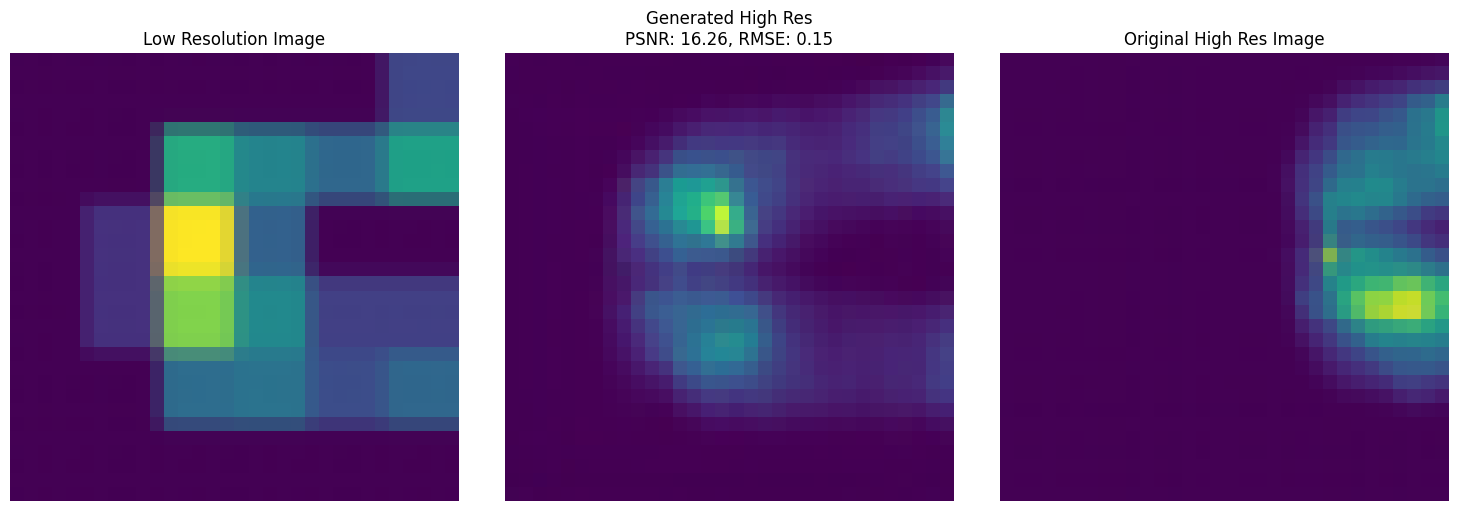

In [15]:
# Function to visualize images
def visualize_images(low_res, generated_high_res, original_high_res, psnr_value, rmse_value):
    import matplotlib.pyplot as plt

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(low_res.permute(1, 2, 0).numpy())
    axs[0].set_title('Low Resolution Image')
    axs[0].axis('off')

    axs[1].imshow(generated_high_res.permute(1, 2, 0).detach().numpy())
    axs[1].set_title(f'Generated High Res\nPSNR: {psnr_value:.2f}, RMSE: {rmse_value:.2f}')
    axs[1].axis('off')

    axs[2].imshow(original_high_res.permute(1, 2, 0).numpy())
    axs[2].set_title('Original High Res Image')
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()

# Function to evaluate and display images
def evaluate_image(index):
    # Ensure index is within bounds
    if index < 0 or index >= len(low_res_images):
        print("Index out of range. Please select a valid index.")
        return

    # Get the images
    low_res = low_res_images[index].unsqueeze(0)  # Add batch dimension
    original_high_res = high_res_images[index]

    # Generate high-resolution image
    generator.eval()  # Set generator to evaluation mode
    with torch.no_grad():
        generated_high_res = generator(low_res).squeeze(0)  # Remove batch dimension

    # Calculate PSNR and RMSE
    psnr_value = psnr(original_high_res.numpy(), generated_high_res.numpy())
    rmse_value = np.sqrt(mse(original_high_res.numpy(), generated_high_res.numpy()))

    # Visualize images and metrics
    visualize_images(low_res.squeeze(0), generated_high_res, original_high_res, psnr_value, rmse_value)

# Example usage
evaluate_image(460)  # Replace 0 with the desired index


In [17]:
import os
import numpy as np
import torch
from PIL import Image

# Function to save the generated high-res images
def save_generated_images(output_folder):
    # Create the folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through all low-res images
    generator.eval()  # Set generator to evaluation mode
    for i, low_res in enumerate(low_res_images):
        # Add batch dimension
        low_res = low_res.unsqueeze(0)

        # Generate high-resolution image
        with torch.no_grad():
            generated_high_res = generator(low_res).squeeze(0)  # Remove batch dimension

        # Convert to NumPy array and scale to 0-255
        generated_image = (generated_high_res.permute(1, 2, 0).detach().numpy() * 255).astype(np.uint8)

        # Convert to PIL image for saving
        pil_image = Image.fromarray(generated_image)

        # Save the image
        image_path = os.path.join(output_folder, f'gen_img_{i+1}.png')
        pil_image.save(image_path)

        print(f"Saved: {image_path}")

# Example usage
output_folder = "generated_6"
save_generated_images(output_folder)


Saved: generated_6/gen_img_1.png
Saved: generated_6/gen_img_2.png
Saved: generated_6/gen_img_3.png
Saved: generated_6/gen_img_4.png
Saved: generated_6/gen_img_5.png
Saved: generated_6/gen_img_6.png
Saved: generated_6/gen_img_7.png
Saved: generated_6/gen_img_8.png
Saved: generated_6/gen_img_9.png
Saved: generated_6/gen_img_10.png
Saved: generated_6/gen_img_11.png
Saved: generated_6/gen_img_12.png
Saved: generated_6/gen_img_13.png
Saved: generated_6/gen_img_14.png
Saved: generated_6/gen_img_15.png
Saved: generated_6/gen_img_16.png
Saved: generated_6/gen_img_17.png
Saved: generated_6/gen_img_18.png
Saved: generated_6/gen_img_19.png
Saved: generated_6/gen_img_20.png
Saved: generated_6/gen_img_21.png
Saved: generated_6/gen_img_22.png
Saved: generated_6/gen_img_23.png
Saved: generated_6/gen_img_24.png
Saved: generated_6/gen_img_25.png
Saved: generated_6/gen_img_26.png
Saved: generated_6/gen_img_27.png
Saved: generated_6/gen_img_28.png
Saved: generated_6/gen_img_29.png
Saved: generated_6/gen_